In [1]:
import os

from PIL import Image
import matplotlib.pyplot as plt

from xrkit.base import CONFIG
from xrkit.models import *
from xrkit.data.dataset import RSUADataset

from torch.utils.data import DataLoader

import pytorch_lightning as L

os.chdir("..")

In [2]:
INCEPTIONRESNETV2UNET_PATH = "/home/yullhan/Projects/NIH-ChestXRay/models/inceptionresnetv2unet/model-epoch=000-validation_dice=0.88.ckpt"
MOBILENETV2UNET_PATH = (
    "/home/yullhan/Projects/NIH-ChestXRay/models/mobilenetv2unet/model-epoch=085-validation_dice=0.97.ckpt"
)

In [3]:
def plot_images_predictions(model, images, device="cuda"):
    inputs, targets = images
    inputs, targets = inputs.to(device), targets.numpy()
    outputs, targets = model((inputs, targets))
    outputs = outputs.detach().cpu().numpy()

    for index in range(4):
        image1 = Image.fromarray(images[0][index].numpy()[0] * 255)
        image2 = Image.fromarray((targets[index][0] * 255))
        image3 = Image.fromarray((outputs[index][0] * 255))

        _, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(image1)
        axes[0].set_title("Original")

        axes[1].imshow(image2)
        axes[1].set_title("Mask")

        axes[2].imshow(image3)
        axes[2].set_title("DNN")

        for axis in axes:
            axis.axis("off")

        plt.tight_layout()
        plt.show()

In [4]:
test_dataset = RSUADataset("test")
test_loader = DataLoader(
    test_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

In [5]:
device = "cuda"
test_images = next(iter(test_loader))

In [9]:
from pathlib import Path

[a.unlink() for a in Path(".").rglob("*:Zone.Identifier")]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

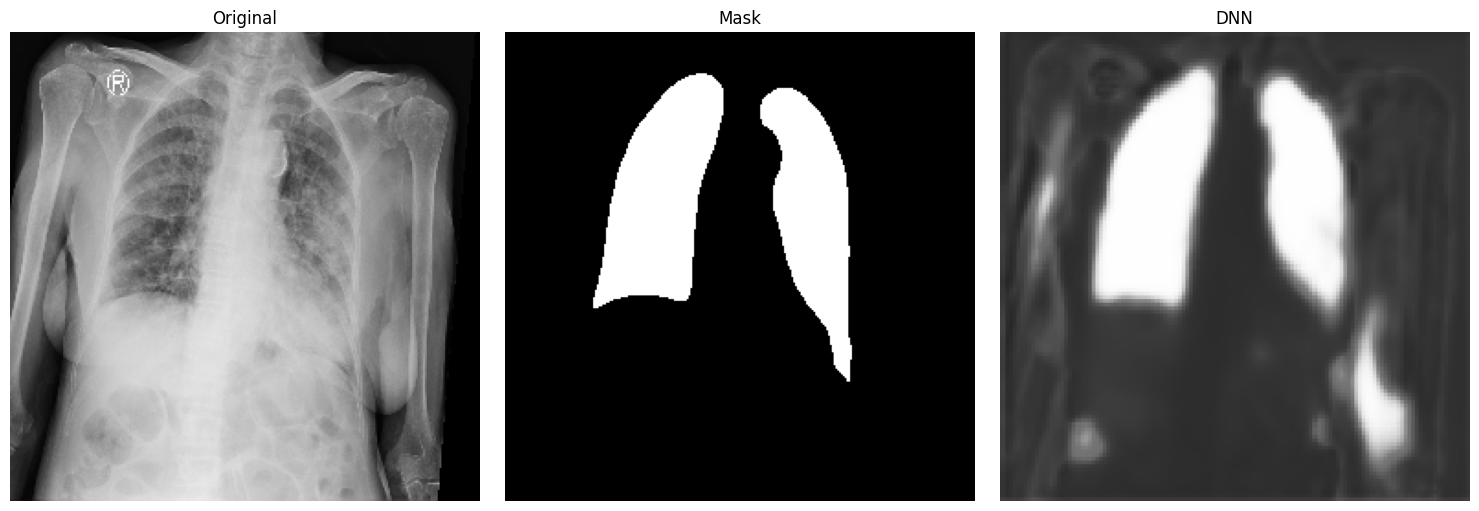

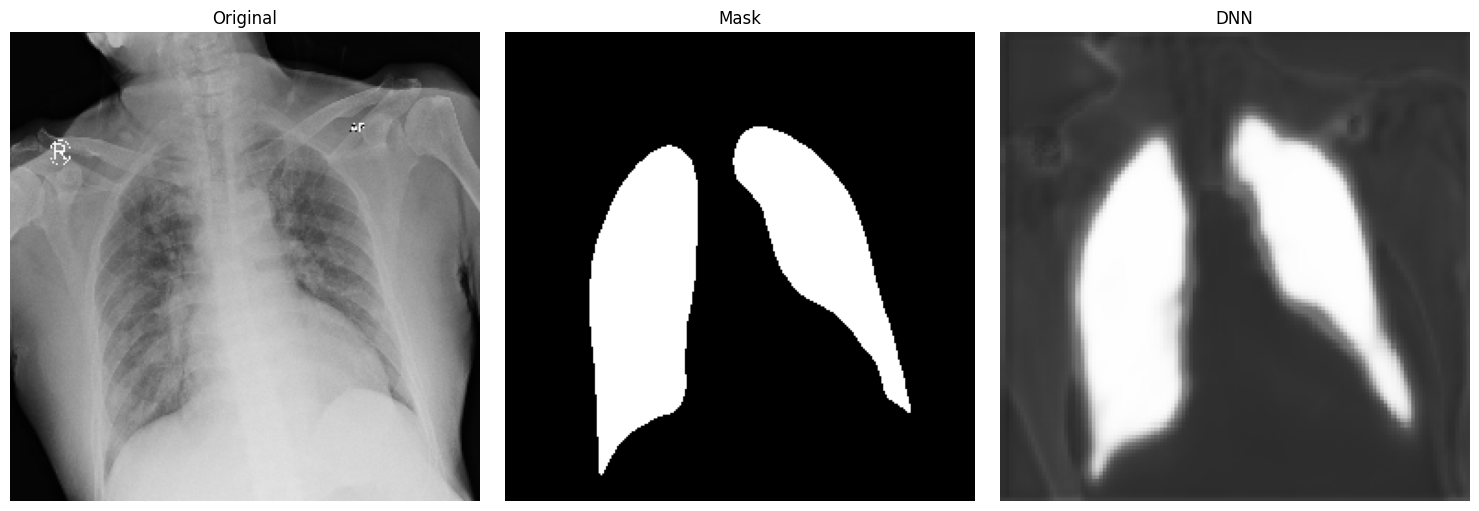

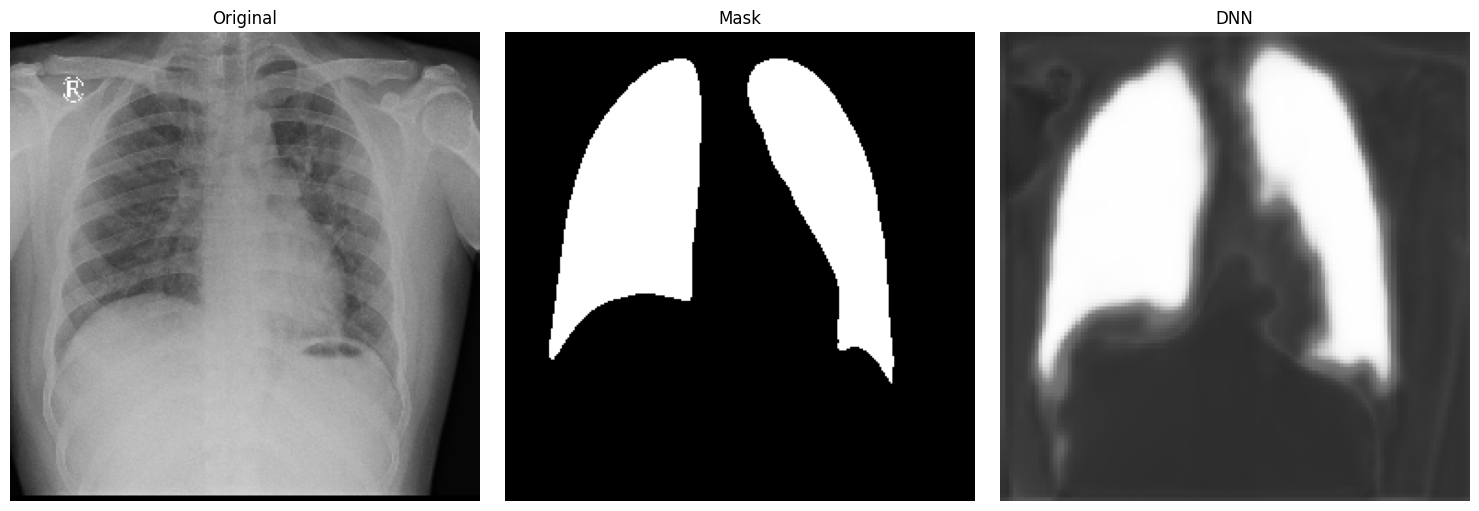

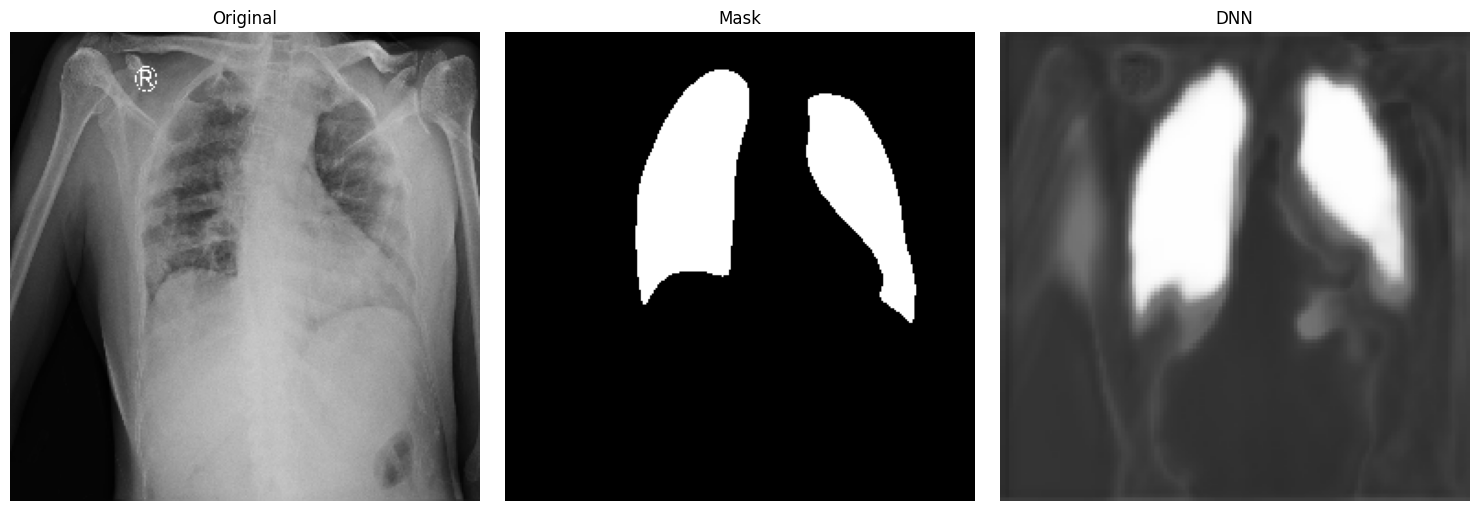

In [6]:
model = InceptionResNetV2UNetModel.load_from_checkpoint(checkpoint_path=INCEPTIONRESNETV2UNET_PATH).to(device)
model.eval()

plot_images_predictions(model, test_images, device)

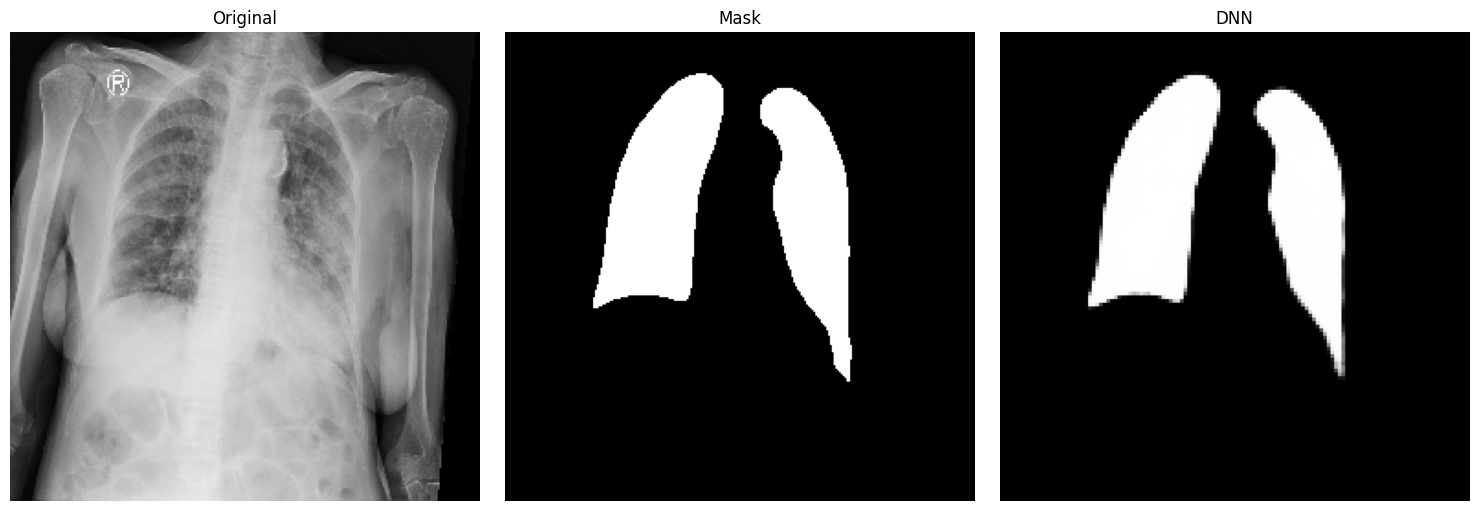

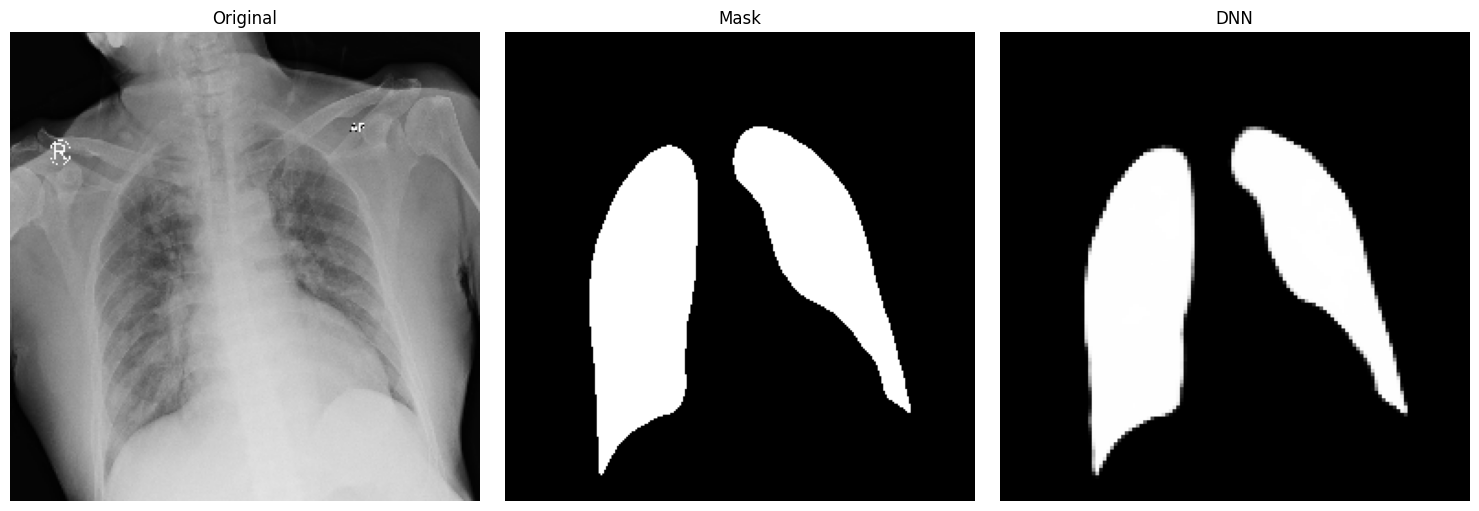

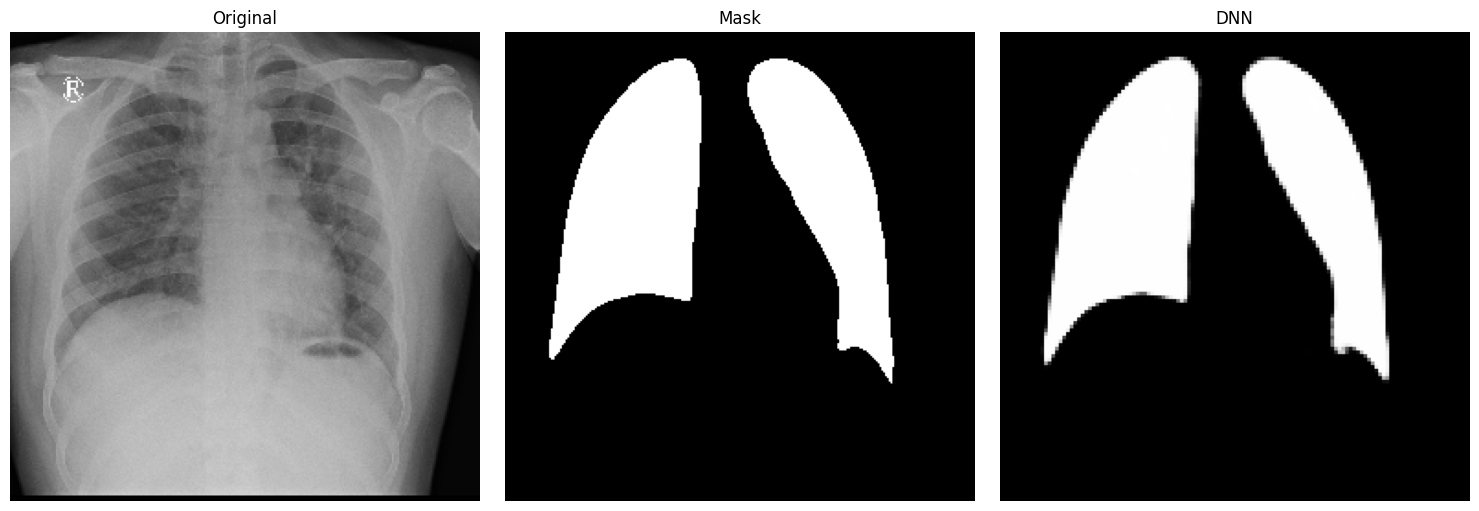

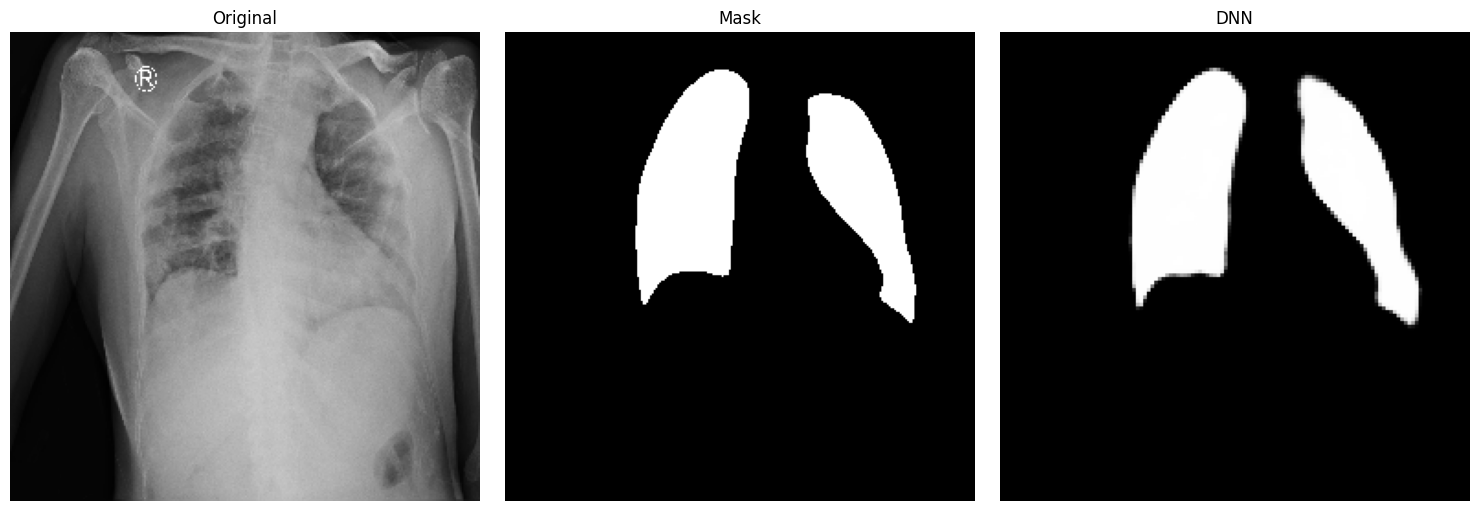

In [7]:
model = MobileNetV2UNetModel.load_from_checkpoint(checkpoint_path=MOBILENETV2UNET_PATH).to(device)
model.eval()

plot_images_predictions(model, test_images, device)